In [1]:
import mne
from scipy.io import loadmat
import numpy as np

In [2]:
def file_to_data(fileName):
    chnames = ['Fp1','Fp2','Fc5','Fz','Fc6','T7','Cz','T8','P7','P3','Pz','P4','P8','O1','Oz','O2','stim']
    chtypes = ['eeg'] * 16 + ['stim']
    info = mne.create_info(ch_names=chnames, sfreq=512,ch_types=chtypes, montage='standard_1020',verbose=False)
    data = loadmat(fileName)["SIGNAL"]
    #On modifie pour avoir un dataset avec 1 : yeux ouvert et -1 yeux fermée
    new_data=[]
    yeux_ouvert=False
    for k in range(len(data)):
        if(yeux_ouvert==False):
            tmp=np.append(data[k][1:17],-1)
        else:
            tmp=np.append(data[k][1:17],1)
        new_data.append(tmp)
        if(data[k][17]==1):
            yeux_ouvert=True
        if(data[k][18]==1):
            yeux_ouvert=False
    labels= [d[16] for d in new_data]
    donnees = [d[:16] for d in new_data]
    return donnees,labels

In [3]:
donnees,labels = file_to_data("data/subject_01.mat")

In [4]:
new_donnees=[]
moyennation=20
for k in range(len(donnees)):
    if(k>moyennation):
        tmp=[]
        for i in range(len(donnees[k])):
            tmp.append(np.mean(donnees[k-moyennation:k][i]))
        new_donnees.append(tmp)
donnees=new_donnees
labels=labels[:-moyennation-1]

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [6]:
#validation croisée Perceptron
#tol =1e-1 condition d'arret
tab_f1_score=[]
tab_pourcentage_train=[]
for k in range(4,25):
    tab_pourcentage_train.append( ( (k-1)/k )*100 )
    print(str(( (k-1)/k )*100)+"% du dataset pour le train")
    neigh = KNeighborsClassifier(n_neighbors=10)
    y_pred = cross_val_predict(neigh,donnees,labels,cv=k)
    rapport = classification_report(labels, y_pred,output_dict=True)
    print("F1 Score : "+str(rapport['micro avg']["f1-score"]))
    tab_f1_score.append(rapport['micro avg']["f1-score"])
print(rapport)

75.0% du dataset pour le train
F1 Score : 0.4901867481446234
80.0% du dataset pour le train
F1 Score : 0.484535049713241
83.33333333333334% du dataset pour le train
F1 Score : 0.5204821892191974
85.71428571428571% du dataset pour le train
F1 Score : 0.5034770050172389
87.5% du dataset pour le train
F1 Score : 0.5217010193092739
88.88888888888889% du dataset pour le train
F1 Score : 0.5310426006160935
90.0% du dataset pour le train
F1 Score : 0.5534907794668871
90.9090909090909% du dataset pour le train
F1 Score : 0.5393072704049688
91.66666666666666% du dataset pour le train
F1 Score : 0.5529564977835658
92.3076923076923% du dataset pour le train
F1 Score : 0.5372202325794952
92.85714285714286% du dataset pour le train
F1 Score : 0.5631161979179711
93.33333333333333% du dataset pour le train
F1 Score : 0.557681551420438
93.75% du dataset pour le train
F1 Score : 0.5355172097139088
94.11764705882352% du dataset pour le train
F1 Score : 0.5638842278377453
94.44444444444444% du dataset po

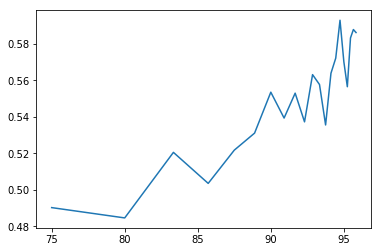

In [7]:
plt.plot(tab_pourcentage_train,tab_f1_score)
plt.show()